# Programa de manipulación de base de datos
### De Excel a PDV:
- Agregar información del departamento
- Agregar información del costo
- Agregar información de la descripción del producto
- Agregar información del precio al público
### De PDV a Excel:
- Agregar información del precio al público
### En PDV:
- Borrar todos los productos sin departamento
- Aumentar precio al público

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### Configuración inicial:

In [1]:
# CONNECT "localhost:C:/Users/casa/Desktop/DB-Helper/PDVDATA.FDB" user 'SYSDBA' password 'masterkey';
import pandas as pd
import fdb
import datetime
import sys

In [2]:
excel_df = pd.read_excel('Provedores Todos.xlsm', sheet_name='Datos', index_col=0, na_values='--', skipfooter=10, usecols='A:AE')

c:\Users\casa\miniconda3\envs\test1\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
excel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1185 entries, 1 to 1185
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Provedor             1185 non-null   object        
 1   Descripción          1182 non-null   object        
 2   Producto             1185 non-null   object        
 3   Subtotal             1117 non-null   float64       
 4   Costo Unitario       1185 non-null   float64       
 5   IVA                  1185 non-null   float64       
 6   IEPS                 1185 non-null   float64       
 7   Descuento            1185 non-null   float64       
 8   Total                1185 non-null   float64       
 9   Precio al Público    1171 non-null   float64       
 10  Margen               1112 non-null   float64       
 11  Utilidad Unitaria    1184 non-null   float64       
 12  Utilidad por pedido  1184 non-null   float64       
 13  Piezas               1185 non-nul

In [4]:
con = fdb.connect(dsn="localhost:C:/Users/casa/Desktop/DB-Helper/PDVDATA.FDB", user='SYSDBA', password='masterkey')
cur = con.cursor()

In [5]:
cur.execute('SELECT ID FROM DEPARTAMENTOS')
x = cur.fetchall()
print(x)

[(3,), (2,), (5,), (6,), (7,), (8,), (9,), (10,), (11,), (12,), (13,), (14,), (15,), (16,), (17,), (18,), (19,), (20,), (21,), (22,), (23,), (24,), (25,), (26,), (27,), (28,), (29,), (30,), (31,), (32,), (33,), (34,), (35,), (36,), (37,), (38,), (39,), (40,)]


In [6]:
cur.execute("SELECT NOMBRE FROM DEPARTAMENTOS WHERE ID = 20;")
y = cur.fetchone()
print(y)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf1 in position 2: invalid continuation byte

In [ ]:
cur.execute('SELECT NOMBRE FROM DEPARTAMENTOS WHERE ID = 23')
y = cur.fetchone()
print(y)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf1 in position 5: invalid continuation byte

In [ ]:
cur.execute('SELECT NOMBRE FROM DEPARTAMENTOS WHERE ID = 25')
y = cur.fetchone()
print(y)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 1: invalid continuation byte

In [ ]:
cur.execute('SELECT NOMBRE FROM DEPARTAMENTOS WHERE ID = 36')
y = cur.fetchone()
print(y)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf1 in position 14: invalid continuation byte

In [ ]:
for el in x:
    if el[0] != 20 and el[0] != 23 and el[0] != 25 and el[0] != 36:
        cur.execute('SELECT NOMBRE FROM DEPARTAMENTOS WHERE ID = ?', (el[0],))
        y = cur.fetchone()
        print(y)

('- Sin Departamento -',)
('Sin Departamento',)
('Productos Comunes',)
('Bimbo Blanco',)
('Bimbo Dulce',)
('Barcel',)
('Sabritas',)
('Leo',)
('Encanto',)
('Bokados',)
('Marinela Pastel',)
('Ricolino',)
('Lala',)
('Coca-Cola',)
('Pepsi',)
('Bonafont Botella',)
('bonafon garrafon (Eliminado 08/12/2022)',)
('valle (Eliminado 08/12/2022)',)
('Gamesa',)
('tang (Eliminado 08/12/2022)',)
('Tostitos',)
('Sigma',)
('Verdura',)
('59 (Eliminado 08/12/2022)',)
('Del Valle',)
('Pall Mall',)
('Bonafont Garrafon',)
('Varios',)
('Bimbo Totopos',)
('Marinela Galleta',)
('Especias',)
('Hielati',)
('Kinder',)
('Marlboro',)


In [ ]:
# Tía Rosa             ---> 25
# Tostadas Norteñas    ---> 36
# Treviño              ---> 23
# Peñafiel             ---> 20

In [ ]:
cur.execute( "UPDATE DEPARTAMENTOS SET NOMBRE = ? WHERE ID = 20;", ('Peñafiel'.encode("utf-8"),) )
cur.execute( "UPDATE DEPARTAMENTOS SET NOMBRE = ? WHERE ID = 23;", ('Treviño'.encode("utf-8"),) )
cur.execute( "UPDATE DEPARTAMENTOS SET NOMBRE = ? WHERE ID = 25;", ('Tía Rosa'.encode("utf-8"),) )
cur.execute( "UPDATE DEPARTAMENTOS SET NOMBRE = ? WHERE ID = 36;", ('Tostadas Norteñas'.encode("utf-8"),) )
con.commit()

In [ ]:
cur.execute("SELECT ID, NOMBRE FROM DEPARTAMENTOS;")
x = cur.fetchall()
dict_prov = dict((v, k) for k, v in x)
print(dict_prov)
'''
{'- Sin Departamento -': 3, 'Sin Departamento': 2, 'Productos Comunes': 5, 'Bimbo Blanco': 6, 'Bimbo Dulce': 7, 'Barcel': 8, 'Sabritas': 9, 'Leo': 10, 'Encanto': 11, 'Bokados': 12, 'Marinela Pastel': 13, 'Ricolino': 14, 'Lala': 15, 'Coca-Cola': 16, 'Pepsi': 17, 'Bonafont Botella': 18, 'bonafon garrafon (Eliminado 08/12/2022)': 19, 'Peñafiel': 20, 'valle (Eliminado 08/12/2022)': 21, 'Gamesa': 22, 'Treviño': 23, 'tang (Eliminado 08/12/2022)': 24, 'Tía Rosa': 25, 'Tostitos': 26, 'Sigma': 27, 'Verdura': 28, '59 (Eliminado 08/12/2022)': 29, 'Del Valle': 30, 'Pall Mall': 31, 'Bonafont Garrafon': 32, 'Varios': 33, 'Bimbo Totopos': 34, 'Marinela Galleta': 35, 'Tostadas Norteñas': 36, 'Especias': 37, 'Hielati': 38, 'Kinder': 39, 'Marlboro': 40}
'''

{'- Sin Departamento -': 3, 'Sin Departamento': 2, 'Productos Comunes': 5, 'Bimbo Blanco': 6, 'Bimbo Dulce': 7, 'Barcel': 8, 'Sabritas': 9, 'Leo': 10, 'Encanto': 11, 'Bokados': 12, 'Marinela Pastel': 13, 'Ricolino': 14, 'Lala': 15, 'Coca-Cola': 16, 'Pepsi': 17, 'Bonafont Botella': 18, 'bonafon garrafon (Eliminado 08/12/2022)': 19, 'Peñafiel': 20, 'valle (Eliminado 08/12/2022)': 21, 'Gamesa': 22, 'Treviño': 23, 'tang (Eliminado 08/12/2022)': 24, 'Tía Rosa': 25, 'Tostitos': 26, 'Sigma': 27, 'Verdura': 28, '59 (Eliminado 08/12/2022)': 29, 'Del Valle': 30, 'Pall Mall': 31, 'Bonafont Garrafon': 32, 'Varios': 33, 'Bimbo Totopos': 34, 'Marinela Galleta': 35, 'Tostadas Norteñas': 36, 'Especias': 37, 'Hielati': 38, 'Kinder': 39, 'Marlboro': 40}


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### 1era. operación: 
##### actualizar información del excel al **punto de venta.**

In [ ]:
def update_or_create(code, row):
    date = datetime.date.today()
    year = str(date.year)
    month = str(date.month)
    day = str(date.day)
    today = f'{year}, {month}, {day}'
    
    # create new product if it doesn't exist
    cur.execute("SELECT * FROM PRODUCTOS WHERE CODIGO = ?;", (code,))
    try:
        x = cur.fetchone()
    except Exception as err:
        print('Unexpected Error ----> ', err)
        print('Error on code ---> ', code, 'Description ---> ', row['Producto'])
        #cur.execute("UPDATE PRODUCTOS SET DESCRIPCION = ? WHERE CODIGO = ?;", (row['Producto'], code))
        sys.exit()
    if not x:
        cur.execute( "INSERT INTO PRODUCTOS (CHECADO_EN, CODIGO, DESCRIPCION, TVENTA, PCOSTO, PVENTA, DEPT, PROVID, UMEDIDA, MAYOREO, IPRIORIDAD, DINVENTARIO, DINVMINIMO, DINVMAXIMO, PORCENTAJE_GANANCIA, COMPONENTES, IMPUESTOS, PVENTA_ANTERIOR, PCOSTO_ANTERIOR, PMAYOREO_ANTERIOR) VALUES (?, ?, ?, 'U', ?, ?, ?, 0, 0, 0.0, 0, 0.0, 0, 0, 0, '', '', 0.0, 0.0, 0.0);", (today.encode('utf-8'), code.encode('utf-8') if isinstance(code, str) else code, row['Producto'].encode('utf-8') if pd.notna(row['Producto']) else '', row['Costo Unitario'] if pd.notna(row['Costo Unitario']) else 0.0, row['Precio al Público'] if pd.notna(row['Precio al Público']) else 0.0, dict_prov[row['Provedor']] if pd.notna(row['Provedor']) else 2) )
        print(f'Inserted new product code {code}')
        # if it does exist update information (price, cost, department and description)
    else:
        cur.execute( "UPDATE PRODUCTOS SET PVENTA = ?, PCOSTO = ?, DEPT = ?, DESCRIPCION = ? WHERE CODIGO = ?;", (row['Precio al Público'] if pd.notna(row['Precio al Público']) and x[4] < row['Precio al Público'] else x[4], row['Costo Unitario'] if pd.notna(row['Costo Unitario']) else x[3], dict_prov[row['Provedor']] if pd.notna(row['Provedor']) else x[5], row['Producto'].encode('utf-8') if pd.notna(row['Producto']) else x[1], code.encode('utf-8') if isinstance(code, str) else code) )
        if x[4] > row['Precio al Público']:
            print(f'PDV has a higher price on code: {code}, price: {x[4]}')
        if x[4] < row['Precio al Público'] and pd.notna(row['Precio al Público']):
            print(f"Updated product code {code}. Old price: {x[4]} - New price: {row['Precio al Público']}")
    

In [ ]:
for index, row in excel_df.iterrows():
    # On barcode
    if pd.notna(row['Código de Barras']):
        # when more than one barcode then it is a string separated by commas (1234, 1236, 7895)
        if isinstance(row['Código de Barras'], str):
            x = row['Código de Barras'].split(',')
            for num in x:
                num = int(num.strip())
                update_or_create(code=num, row= row)
        # else barcode is a number (12345)
        else:
            update_or_create(code=row['Código de Barras'], row=row)
    # if code is not a barcode then it's a custom code may be str or num. Only one value
    if pd.notna(row['Código SuperFuentes']):
        update_or_create(code=row['Código SuperFuentes'].upper() if isinstance(row['Código SuperFuentes'], str) else row['Código SuperFuentes'], row=row)

    con.commit()

PDV has a higher price on code: 7501041420039, price: 20.0
PDV has a higher price on code: LI, price: 49.0


In [ ]:
cur.execute("SELECT DESCRIPCION FROM PRODUCTOS WHERE CODIGO = 7501000264773")
x = cur.fetchall()
x

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf1 in position 12: invalid continuation byte

In [ ]:
cur.execute("SELECT DEPT FROM PRODUCTOS WHERE CODIGO = 7501000264773")
x = cur.fetchall()
x

[(8,)]

In [ ]:
cur.execute("SELECT CODIGO FROM PRODUCTOS")
for x in cur:
    print(x)

('7501040091018',)
('78600843',)
('7501040090141',)
('7501040090301',)
('7501005194198',)
('7501000100439',)
('7501184600275',)
('10722581923',)
('7501073417106',)
('7501001030032',)
('7501011176713',)
('78984187017',)
('75013578',)
('7501017003655',)
('7501011116368',)
('75003197',)
('7501011192621',)
('77910000031',)
('78984234919',)
('7501003126221',)
('7501017340590',)
('7501005192880',)
('7501011176690',)
('7501000655687',)
('78984194916',)
('70330700918',)
('7501002662928',)
('7501843507761',)
('7501073411173',)
('7503000142136',)
('7501003129185',)
('78984077011',)
('78984337016',)
('78984000231',)
('78984034915',)
('78984334916',)
('75000059',)
('7501011142916',)
('32239057029',)
('7501032940201',)
('78984184917',)
('7501001030155',)
('7501025431020',)
('7501011193420',)
('75009694',)
('75001940',)
('2220200',)
('7501011197916',)
('7501011183643',)
('95188010347',)
('7501001610142',)
('7501011177147',)
('7501011176874',)
('41333600017',)
('7501008017746',)
('7500478032259',)
('

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 0: unexpected end of data

In [ ]:
# CODIGO = "Ñ"
cur.execute( "SELECT * FROM PRODUCTOS WHERE CODIGO = ?;", ('Ñ'.encode("utf-8"),) )
x = cur.fetchall()
print(x)

[]


In [ ]:
cur.execute("SELECT * FROM PRODUCTOS WHERE DESCRIPCION = ?;", ('PAÑAL SUELTO C/UNO'.encode("utf-8"),) )
x = cur.fetchall()
print(x)

[]


In [ ]:
cur.execute("SELECT * FROM PRODUCTOS;")
index = 0
for x in cur:
    print(index)
    try:
        print(x)
    except Exception as err:
        print('The error ---> ', err)
        continue

0
('7501040091018', 'YOP DE BEBER', 'U', 0.0, 7.199999809265137, 2, 0, 0, 0.0, None, None, None, None, None, 0, '', '', None, None, None)
0
('78600843', 'H A N U T A', 'U', 0.0, 35.5, 2, 0, 0, 0.0, None, None, None, None, None, 0, '', '', None, None, None)
0
('7501040090141', 'YOPLAI VASO', 'U', 0.0, 5.5, 2, 0, 0, 0.0, None, None, None, None, None, 0, '', '', None, None, None)
0
('7501040090301', 'YOPLAIT VASO', 'U', 0.0, 4.5, 2, 0, 0, 0.0, None, None, None, None, None, 0, '', '', None, None, None)
0
('7501005194198', 'ADEREZO DE MAYONESA HELLMANNS', 'U', 0.0, 6.5, 2, 0, 0, 0.0, None, None, None, None, None, 0, '', '', None, None, None)
0
('7501000100439', 'DONITAS DE CHOCOLATE', 'U', 0.0, 4.0, 2, 0, 0, 0.0, None, None, None, None, None, 0, '', '', None, None, None)
0
('7501184600275', 'P A L E T A  YOGUR', 'U', 0.0, 6.0, 2, 0, 0, 0.0, None, None, None, None, None, 0, '', '', None, None, None)
0
('10722581923', 'A M Y', 'U', 0.0, 3.0, 2, 0, 0, 0.0, None, None, None, None, None, 0, '', 

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 2: invalid continuation byte

In [ ]:
cur.execute("SELECT * FROM PRODUCTOS;")
err_count = 0
err_indexes = []
for i in range(6451):
    try:
        x = cur.fetchone()
        print(x)
        if not x:
            print('las indexes ----> ', i)
    except Exception as err:
        err_count += 1
        err_indexes.append(i)
        print('Error on index ---> ', i)
        #print('The error ---_> ', err)
        continue
print('the error count ----> ', err_count)
print('the error indexes -----> ', err_indexes)

('7501040091018', 'YOP DE BEBER', 'U', 0.0, 7.199999809265137, 2, 0, 0, 0.0, None, None, None, None, None, 0, '', '', None, None, None)
('78600843', 'H A N U T A', 'U', 0.0, 35.5, 2, 0, 0, 0.0, None, None, None, None, None, 0, '', '', None, None, None)
('7501040090141', 'YOPLAI VASO', 'U', 0.0, 5.5, 2, 0, 0, 0.0, None, None, None, None, None, 0, '', '', None, None, None)
('7501040090301', 'YOPLAIT VASO', 'U', 0.0, 4.5, 2, 0, 0, 0.0, None, None, None, None, None, 0, '', '', None, None, None)
('7501005194198', 'ADEREZO DE MAYONESA HELLMANNS', 'U', 0.0, 6.5, 2, 0, 0, 0.0, None, None, None, None, None, 0, '', '', None, None, None)
('7501000100439', 'DONITAS DE CHOCOLATE', 'U', 0.0, 4.0, 2, 0, 0, 0.0, None, None, None, None, None, 0, '', '', None, None, None)
('7501184600275', 'P A L E T A  YOGUR', 'U', 0.0, 6.0, 2, 0, 0, 0.0, None, None, None, None, None, 0, '', '', None, None, None)
('10722581923', 'A M Y', 'U', 0.0, 3.0, 2, 0, 0, 0.0, None, None, None, None, None, 0, '', '', None, None, 

In [ ]:
cur.execute("SELECT CODIGO FROM PRODUCTOS;")
code_err_count = 0
code_err_indexes = []
for i in range(6451):
    try:
        x = cur.fetchone()
        print(x)
        if not x:
            print('las indexes ----> ', i)
    except Exception as err:
        code_err_count += 1
        code_err_indexes.append(i)
        print('Error on index ---> ', i)
        #print('The error ---_> ', err)
        continue
print('the error count ----> ', code_err_count)
print('the error indexes -----> ', code_err_indexes)
# 2875 codigo Ñ descripcion PAÑAL SUELTO C/UNO
# 3886 codigo º7501480900154 descripcion tostileo
# 2 errors 

('7501040091018',)
('78600843',)
('7501040090141',)
('7501040090301',)
('7501005194198',)
('7501000100439',)
('7501184600275',)
('10722581923',)
('7501073417106',)
('7501001030032',)
('7501011176713',)
('78984187017',)
('75013578',)
('7501017003655',)
('7501011116368',)
('75003197',)
('7501011192621',)
('77910000031',)
('78984234919',)
('7501003126221',)
('7501017340590',)
('7501005192880',)
('7501011176690',)
('7501000655687',)
('78984194916',)
('70330700918',)
('7501002662928',)
('7501843507761',)
('7501073411173',)
('7503000142136',)
('7501003129185',)
('78984077011',)
('78984337016',)
('78984000231',)
('78984034915',)
('78984334916',)
('75000059',)
('7501011142916',)
('32239057029',)
('7501032940201',)
('78984184917',)
('7501001030155',)
('7501025431020',)
('7501011193420',)
('75009694',)
('75001940',)
('2220200',)
('7501011197916',)
('7501011183643',)
('95188010347',)
('7501001610142',)
('7501011177147',)
('7501011176874',)
('41333600017',)
('7501008017746',)
('7500478032259',)
('

In [ ]:
cur.execute("SELECT DESCRIPCION FROM PRODUCTOS;")
desc_err_count = 0
desc_err_indexes = []
for i in range(6451):
    try:
        x = cur.fetchone()
        print(x)
        if not x:
            print('las indexes ----> ', i)
    except Exception as err:
        desc_err_count += 1
        desc_err_indexes.append(i)
        print('Error on index ---> ', i)
        #print('The error ---_> ', err)
        continue
print('the error count ----> ', desc_err_count)
print('the error indexes -----> ', desc_err_indexes)
# 195 error

('YOP DE BEBER',)
('H A N U T A',)
('YOPLAI VASO',)
('YOPLAIT VASO',)
('ADEREZO DE MAYONESA HELLMANNS',)
('DONITAS DE CHOCOLATE',)
('P A L E T A  YOGUR',)
('A M Y',)
('C A F E  DOLCA',)
('C O D O S',)
('CHUPA  BARRITA',)
('BARRIL',)
('F R U T S I',)
('FRIJOL NEGRO REFRITO',)
('FRITOS CON LIMON 150 G',)
('G E R B E R',)
('H I E L O  2.5 kg',)
('Cerillos Maya ',)
('HIT GRAPE FLAVOR',)
('Jugo V8 Herdez 335ml.',)
('LIBRETA ITALIANA 50 HOJAS',)
('MOSTAZA H E LL M A NN S',)
('MR  B I G',)
('MUECAS',)
('BARRIL 2',)
('BIC TWIN',)
('TANG MANDARINA',)
('U H U   20 mL',)
('Chocolate Abuelita Tabletas 90g.',)
('ALCOHOL Las Canitas 250 ml.',)
('ATUN HERDEZ',)
('BARRIL',)
('BARRIL',)
('BARRIL 2',)
('BARRIL  FRESA',)
('BARRIL 2',)
('CATSUP DEL MONTE',)
('CHICHARRON DE CERDO 60 G',)
('CLAMATO',)
('color fiel blanco 60ml',)
('DEL VALLE',)
('F I D E O  MEDIANO',)
('Flash Lavanda 500ml.',)
('FRESQUI BON  TOTAL',)
('FRESQUIBON UVA',)
('FRUTSI DE NARANJA 250ML',)
('DOUBLEMINT',)
('K A K A HUATES 105G',)
('

166 error total
2 on code 
195 on description
 ----> Ñ PAÑAL share error on code and description

In [ ]:
# Get the code on all description errors. Exclude code errors ----> 194 codes
cur.execute("SELECT CODIGO FROM PRODUCTOS;")
with_err_indexes = []
for i in range(6451):
    try:
        x = cur.fetchone()
        if i in err_indexes:
            with_err_indexes.append(x[0])
            print(x)
        if not x:
            print('las indexes ----> ', i)
    except Exception as err:
        print('Error on index ---> ', i)
        #print('The error ---_> ', err)
        continue
print('the error codes -----> ', with_err_indexes)
print('the length of errors ----> ', len(with_err_indexes))
# 2875 codigo Ñ descripcion PAÑAL SUELTO C/UNO
# 3886 codigo º7501480900154 descripcion tostileo

('7501073841246',)
('7501059200012',)
('56100012399',)
('7501005136860',)
('7501000133031',)
('7501000154005',)
('7501000113095',)
('7501030492955',)
('7501000113033',)
('7501000112609',)
('7501621050038',)
('7501011395213',)
('7501003123114',)
('7501003123213',)
('7501017005314',)
('7503006910036',)
('7501003128331',)
('7501052476209',)
('7503006910074',)
('7501017050765',)
('7501002600425',)
('21136019148',)
('7501041204479',)
('7501017003167',)
('7501017005345',)
('7501025414009',)
('7501025408152',)
('7501025408282',)
('7501025408411',)
('7501025408718',)
('7501025413019',)
('7501025414153',)
('7501025413002',)
('7501025408251',)
('7501025408435',)
('7501025409555',)
('7501025409548',)
('7501003152077',)
('7501017004416',)
('7501017042289',)
('7501002663963',)
('7501000636129',)
('38287086004',)
('7501020511956',)
('7501056900854',)
('34000313051',)
('8018190024098',)
('8018190024104',)
('7501017050741',)
('7501017004003',)
('7501441612126',)
('75011635',)
('7501040490279',)
('7501

In [ ]:
cur.execute("SELECT * FROM PRODUCTOS WHERE CODIGO = 7501073841246")
x = cur.fetchall()
print(x)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 2: invalid continuation byte

In [ ]:
cur.execute("SELECT * FROM PRODUCTOS WHERE CODIGO = 7501059200012;")
x = cur.fetchall()
print(x)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 17: invalid start byte

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### 2da. operación: 
##### actualizar información del **precio al público** del punto de venta a **excel.**

In [ ]:
for index, row in excel_df.iterrows():
    if pd.notna(row['Código de Barras']):
        if isinstance(row['Código de Barras'], str):
            excel_df.loc[index, 'Precio al Público'] = ''
            x = row['Código de Barras'].split(',')
            for num in x:
                num = int(num.strip())
                cur.execute("SELECT PVENTA FROM PRODUCTOS WHERE CODIGO = ?;", (num,))
                pp = cur.fetchone()
                excel_df.loc[index, 'Precio al Público'] = excel_df.loc[index, 'Precio al Público'] + str(pp[0]) + ', '
                excel_df.loc[index, 'Última Rev. Precios'] = datetime.date.today()
        else:
            cur.execute("SELECT PVENTA FROM PRODUCTOS WHERE CODIGO = ?;", (row['Código de Barras'],))
            pp = cur.fetchone()
            excel_df.loc[index, 'Precio al Público'] = pp[0]
            excel_df.loc[index, 'Última Rev. Precios'] = datetime.date.today()
    if pd.notna(row['Código SuperFuentes']):
        cur.execute("SELECT PVENTA FROM PRODUCTOS WHERE CODIGO = ?;", (row['Código SuperFuentes'].upper(),))
        pp = cur.fetchone()
        excel_df.loc[index, 'Precio al Público'] = pp[0]
        excel_df.loc[index, 'Última Rev. Precios'] = datetime.date.today()

In [ ]:
with pd.ExcelWriter('updated-info.xlsx') as writer:
    excel_df.to_excel(writer)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### 3ra. operación: 
##### extraer **todo** del punto de venta y pasarlo a un archivo **excel**

In [ ]:
cur.execute("SELECT CODIGO, DESCRIPCION, PCOSTO, PVENTA, DEPT FROM PRODUCTOS")
x = cur.fetchall()
all_df = pd.DataFrame(x, columns=['Código', 'Descripción', 'Costo', 'Precio', 'Departamento'])

In [ ]:
for item in dict_prov.items():
    all_df['Departamento'] = all_df['Departamento'].replace(to_replace=item[1], value=item[0])

In [ ]:
writer = pd.ExcelWriter('todos_productos.xlsx', engine='xlsxwriter')
all_df.to_excel(writer, sheet_name='todo')
writer.close()

4ta. operación: eliminar los productos marcados

In [ ]:
del_df = pd.read_excel('todos_productos_1.xlsx', sheet_name='Eliminar')

In [ ]:
del_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1707 entries, 0 to 1706
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Código        1707 non-null   object 
 1   Descripción   1702 non-null   object 
 2   Costo         1707 non-null   float64
 3   Precio        1707 non-null   float64
 4   Departamento  1707 non-null   object 
 5   eliminar      1707 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 60.1+ KB


In [ ]:
for index, row in del_df.iterrows():
    if row['eliminar'] == 1:
        cur.execute("SELECT DEPT FROM PRODUCTOS WHERE CODIGO = ?;", (row['Código'],))
        x = cur.fetchone()
        if x[0] == 3:
            cur.execute("DELETE FROM PRODUCTOS WHERE CODIGO = ?;", (row['Código'],))

#### Data Analisys

In [ ]:
productos_df = pd.read_sql_query("SELECT * FROM PRODUCTOS", con=con)
productos_df

c:\Users\casa\miniconda3\envs\test1\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 2: invalid continuation byte

In [ ]:
productos_df['TVENTA'].unique()

array(['U', 'D'], dtype=object)

In [ ]:
abonos_df = pd.read_sql_query("SELECT * FROM ABONOS", con=con)
abonos_df

c:\Users\casa\miniconda3\envs\test1\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,ID,CLIENTE_ID,DTFECHA,DMONTO,BCONTAR,GANANCIA,ID_TURNO,FORMA_DE_PAGO,DEVUELTO_EN,ID_CAJA


In [ ]:
cajas_df = pd.read_sql_query("SELECT * FROM CAJAS", con=con)
cajas_df

,ID,NOMBRE,ULTIMA_IP,ULTIMO_INGRESO,NOMBRE_PC,ELIMINADA_EN,ES_PRINCIPAL
0,1,Caja Principal,192.168.1.131,2023-01-08 10:05:47,HOUSE,None,T


In [ ]:
clientes_df = pd.read_sql_query("SELECT * FROM CLIENTES", con=con)
clientes_df

c:\Users\casa\miniconda3\envs\test1\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,NUMERO,NOMBRE,DIRECCION,TELEFONO,DSALDOACTUAL,DTACTUALIZASALDO,LIMITE_CREDITO,ULTIMO_PAGO_EN,FOLIO


In [ ]:
config_df = pd.read_sql_query("SELECT * FROM CONFIGURACION", con=con)
config_df

c:\Users\casa\miniconda3\envs\test1\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,ID,PARAMETRO,VALOR,CAJA_ID
0,1,ultima.version.enlared,0,-1
1,2,porcentajeganancia.usa,0,1
2,3,porcentajeganancia.valor,20,1
3,4,impuestos.usa,0,-1
4,5,impuestos.desglosar,1,1
5,6,recargas.producto_codigo,,-1
6,7,recargas.proveedor,,-1
7,8,recargas.nocliente,,-1
8,9,recargas.usuario,,-1
9,10,recargas.clave,,-1


In [ ]:
cort1 = pd.read_sql_query("SELECT * FROM CORTE_IMPUESTOS_COBRADOS", con=con)
cort1

c:\Users\casa\miniconda3\envs\test1\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,ID,ID_IMPUESTO,ACUMULADO_IMPUESTOS,ACUMULADO_VENTAS_GRAVADAS,ID_TURNO


In [ ]:
cort2 = pd.read_sql_query("SELECT * FROM CORTE_IMP_COBRADOS_OPERACION", con=con)
cort2

c:\Users\casa\miniconda3\envs\test1\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,ID,ID_IMPUESTO,ACUMULADO_IMPUESTOS,ACUMULADO_VENTAS_GRAVADAS,ID_OPERACION


In [ ]:
cort3 = pd.read_sql_query("SELECT * FROM CORTE_MOVIMIENTOS", con=con)
cort3

c:\Users\casa\miniconda3\envs\test1\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,ID,BORRADO_EL,CUANDO_FUE,MONTO,DESCRIPCION,TIPO,ID_TURNO,FORMA_PAGO,RAZON_DEVOLUCION,ID_CAJA
0,1,None,2018-05-08 21:30:32.986,0.0048,Efectivo faltante al cerrar turno de Benjamín ...,Salida,1,None,None,1
1,2,None,2018-05-10 04:53:01.070,0.0025,Efectivo faltante al cerrar turno de Mary Oroz...,Salida,2,None,None,1
2,5,None,2018-05-14 05:04:58.400,0.0025,Efectivo faltante al cerrar turno de Mary Oroz...,Salida,5,None,None,1
3,3,None,2018-05-10 22:47:25.950,0.0050,Efectivo sobrante al cerrar turno de Mary Oroz...,Entrada,3,None,None,1
4,6,None,2018-05-15 08:55:44.517,0.0050,Efectivo sobrante al cerrar turno de Benjamín ...,Entrada,6,None,None,1
...,...,...,...,...,...,...,...,...,...,...
618,605,None,2022-04-12 02:32:07.318,0.0001,Efectivo sobrante al cerrar turno de Mary Oroz...,Entrada,1426,None,None,1
619,620,None,2022-06-15 22:27:13.294,0.0001,Efectivo sobrante al cerrar turno de Mary Oroz...,Entrada,1492,None,None,1
620,606,None,2022-04-13 02:24:31.493,0.0001,Efectivo faltante al cerrar turno de Mary Oroz...,Salida,1427,None,None,1
621,607,None,2022-04-14 00:59:47.926,0.0001,Efectivo sobrante al cerrar turno de Mary Oroz...,Entrada,1428,None,None,1


In [ ]:
cort4 = pd.read_sql_query("SELECT * FROM CORTE_OPERACIONES", con=con)
cort4

c:\Users\casa\miniconda3\envs\test1\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,ID,DIA,ID_CAJA,ACUMULADO_VENTAS,ACUMULADO_ENTRADAS,ACUMULADO_SALIDAS,ACUMULADO_GANANCIA,VENTAS_EFECTIVO,VENTAS_TARJETA,VENTAS_VALES,VENTAS_CREDITO,ABONOS_EFECTIVO,DEVOLUCIONES_VENTAS_EFECTIVO,DEVOLUCIONES_VENTAS_CREDITO,DEVOLUCIONES_ABONOS_EFECTIVO,NUMERO_VENTAS
0,1,2018-05-08,1,7469.1373,0.000,0.0048,5711.3824,7469.1373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24
1,2,2018-05-09,1,7751.8200,0.000,0.0000,6085.1250,7751.8200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,196
2,3,2018-05-10,1,8075.9250,0.005,0.0025,6008.6500,8075.9250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,212
3,5,2018-05-12,1,8511.5775,0.005,0.0000,6205.1675,8511.5775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,212
4,4,2018-05-11,1,8362.3750,0.000,0.0000,6456.4200,8362.3750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,1523,2022-07-08,1,9217.0000,0.000,0.0000,7053.8450,9217.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,216
1523,1524,2022-07-09,1,10335.0000,0.000,0.0000,7878.4600,10335.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,200
1524,1525,2022-07-10,1,6627.0000,0.000,0.0000,5410.8850,6627.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,148
1525,1526,2022-07-11,1,10027.0000,0.000,0.0000,8191.6925,10027.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,229


In [ ]:
cort5 = pd.read_sql_query("SELECT * FROM CORTE_VENTAS_DEPTO_OPERACIONES", con=con)
cort5

c:\Users\casa\miniconda3\envs\test1\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,ID,ID_DEPARTAMENTO,ACUMULADO_VENTAS,ID_OPERACION,ACUMULADO_GANANCIAS
0,1,2,547.712524,1,389.2125
1,2,3,95.000000,1,82.0000
2,3,2,5306.020020,2,3765.4650
3,4,3,2407.300049,2,2281.1600
4,6,2,5510.625000,3,3729.1800
...,...,...,...,...,...
6766,6766,23,383.149994,1527,86.7800
6767,6768,7,100.000000,1527,100.0000
6768,6767,27,247.500000,1527,51.5000
6769,6770,24,12.000000,1527,12.0000


In [ ]:
cort6 = pd.read_sql_query("SELECT * FROM CORTE_VENTAS_POR_DEPTO", con=con)
cort6

c:\Users\casa\miniconda3\envs\test1\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,ID,ID_DEPARTAMENTO,ACUMULADO_VENTAS,ID_TURNO,ACUMULADO_GANANCIAS
0,1,2,5868.732422,2,4169.6775
1,2,3,2590.300049,2,2451.1600
2,4,2,5495.625000,3,3714.1800
3,5,3,2454.300049,3,2168.4700
4,3,5,38.500000,2,38.5000
...,...,...,...,...,...
6742,6742,23,383.149994,1520,86.7800
6743,6744,7,100.000000,1520,100.0000
6744,6743,27,247.500000,1520,51.5000
6745,6746,24,12.000000,1520,12.0000


In [ ]:
dept1 = pd.read_sql_query("SELECT * FROM DEPARTAMENTOS", con=con)
dept1

c:\Users\casa\miniconda3\envs\test1\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,ID,NOMBRE,PORCENTAJE_IMPUESTO,ACTIVO
0,3,- Sin Departamento -,0,1
1,2,Sin Departamento,0,1
2,5,Productos Comunes,0,0
3,6,Bimbo Blanco,0,1
4,7,Bimbo Dulce,0,1
5,8,Barcel,0,1
6,9,Sabritas,0,1
7,10,Leo,0,1
8,11,Encanto,0,1
9,12,Bokados,0,1


In [ ]:
dept2 = pd.read_sql_query("SELECT * FROM DEPTS", con=con)
dept2

,NUM,NOMBRE
0,1,OO3C01OO526O7EEONC5O
1,2,IE5947P9ION895E9C196
2,3,9E6947NNPIN8I28N4109
3,4,2EP947N87IN879N89C19
4,5,73294771NON8ON8O41CI
5,6,7P29471I2IN801PO7C71
6,7,345947O27IN8881E71E5
7,8,8P0947O4NON845N7ICO1
8,9,5P994748CON8579II114
9,10,31P947668IN8I6ECC15O


In [ ]:
fact1 = pd.read_sql_query("SELECT * FROM FACTURACION_CERTIFICADOS", con=con)
fact1

c:\Users\casa\miniconda3\envs\test1\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,ID,EMISOR_ID,NUMERO_SERIE,VIGENCIA_INICIO,VIGENCIA_FIN,CLAVE_LLAVE_PRIVADA


In [ ]:
fact2 = pd.read_sql_query("SELECT * FROM FACTURACION_CLIENTES", con=con)
fact2

c:\Users\casa\miniconda3\envs\test1\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,ID,RFC,NOMBRE,CALLE,NOEXTERIOR,NOINTERIOR,COLONIA,LOCALIDAD,MUNICIPIO,ESTADO,PAIS,EMAIL,REFERENCIA,CODIGOPOSTAL,REGIMENES
0,1,XAXX010101000,Público en General,None,None,None,None,None,None,None,None,None,None,None,None
1,2,XEXX010101000,Venta al extranjero,None,None,None,None,None,None,None,None,None,None,None,None


In [ ]:
fact3 = pd.read_sql_query("SELECT * FROM FACTURACION_EMISORES", con=con)
fact3

c:\Users\casa\miniconda3\envs\test1\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,ID,RFC,NOMBRE,CALLE,NOEXTERIOR,NOINTERIOR,COLONIA,LOCALIDAD,MUNICIPIO,ESTADO,PAIS,EMAIL,REFERENCIA,CODIGOPOSTAL,ACTIVO,REGIMENES


In [ ]:
fact4 = pd.read_sql_query("SELECT * FROM FACTURACION_FOLIOS", con=con)
fact4

c:\Users\casa\miniconda3\envs\test1\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,ID,EMISOR_ID,SERIE,FOLIO_INICIAL,FOLIO_FINAL,SIGUIENTE_FOLIO,NUMERO_APROBACION,ANO_APROBACION


In [ ]:
fact5 = pd.read_sql_query("SELECT * FROM FACTURACION_INFORMES", con=con)
fact5

c:\Users\casa\miniconda3\envs\test1\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,ID,MES,ANO,GENERADO_EN,CONTENIDO,ENVIADO_EN,TIPO


In [ ]:
fact6 = pd.read_sql_query("SELECT * FROM FACTURAS", con=con)
fact6

c:\Users\casa\miniconda3\envs\test1\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,ID,SERIE,FOLIO,FOLIO_ID,GENERADA_EN,TRANSACCION_DE,FACTURACION_CLIENTE_ID,FACTURACION_EMISOR_ID,VENTATICKET_ID,VENTATICKET_FOLIO,SUBTOTAL,IMPUESTOS,TOTAL,XML,CANCELADA_EN,TIPO,INFORME_ID,CERTIFICADO_ID,TURNO_ID


In [ ]:
hist1 = pd.read_sql_query("SELECT * FROM HISTORIAL_INVENTARIO", con=con)
hist1

c:\Users\casa\miniconda3\envs\test1\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,ID,USUARIO_ID,CUANDO_FUE,TIPO,HABIA,CANTIDAD,CODIGO_PRODUCTO,CAJA_ID,TURNO_ID
0,1,7,2012-06-09 16:59:27,d,0.0,1.0,TA,1,NaN
1,2,7,2014-03-04 15:50:28,d,0.0,1.0,7501000111091,1,NaN
2,3,7,2014-03-04 15:50:29,d,0.0,1.0,604722005833,1,NaN
3,4,7,2014-03-04 15:50:29,d,0.0,1.0,7501011101678,1,NaN
4,5,7,2014-03-05 17:14:44,d,0.0,4.0,7501017042289,1,NaN
...,...,...,...,...,...,...,...,...,...
428,429,3,2018-03-05 17:45:32,d,0.0,1.0,706460249279,1,NaN
429,431,7,2021-02-08 11:46:18,d,0.0,5.0,5,1,997.0
430,432,3,2021-06-10 11:26:35,d,0.0,1.0,7501055303540,1,1117.0
431,433,7,2021-09-09 12:58:28,d,2.0,1.0,TA,1,1209.0


In [ ]:
hist2 = pd.read_sql_query("SELECT * FROM HISTORIAL_USUARIOS", con=con)
hist2

c:\Users\casa\miniconda3\envs\test1\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,ID,USUARIO_ID,CUANDO,CAJA_ID,MOVIMIENTO


In [ ]:
imp1 = pd.read_sql_query("SELECT * FROM IMPUESTOS", con=con)
imp1

c:\Users\casa\miniconda3\envs\test1\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,ID,NOMBRE,PORCENTAJE,DEFECTO,ACTIVO


In [ ]:
med = pd.read_sql_query("SELECT * FROM MEDIDAS", con=con)
med

c:\Users\casa\miniconda3\envs\test1\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,CODIGO,NOMBRE


In [ ]:
mov = pd.read_sql_query("SELECT * FROM MOVIMIENTOS", con=con)
mov

c:\Users\casa\miniconda3\envs\test1\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,ID,OPERACION_ID,MONTO,CUANDO_FUE,COMENTARIOS,TIPO,CLIENTE_ID,CAJA_ID,CAJERO_ID,ABONO_ID
0,2,21,8.000000e+00,2012-08-08 13:23:33.944,08/08/2012 13:23:33,e,None,1,7,None
1,3,21,1.000000e+02,2012-08-08 13:42:49.135,08/08/2012 13:42:49,e,None,1,7,None
2,4,21,0.000000e+00,2012-08-08 14:23:48.955,08/08/2012 14:23:48,e,None,1,7,None
3,5,182,1.000000e+01,2013-01-16 12:47:02.694,01/16/2013 12:47:02,e,None,1,7,None
4,6,490,9.000000e+00,2013-11-21 13:33:40.693,11/21/2013 13:33:40,e,None,1,7,None
5,7,490,9.000000e+00,2013-11-21 13:34:26.362,mari,s,None,1,7,None
6,8,585,1.000000e+00,2014-02-24 12:37:59.822,02/24/2014 12:37:59,e,None,1,7,None
7,9,650,9.100000e+02,2014-04-30 10:37:40.252,04/30/2014 10:37:40,e,None,1,3,None
8,10,667,8.190000e+02,2014-05-17 09:42:40.432,05/17/2014 09:42:40,e,None,1,3,None
9,11,690,9.100000e+02,2014-06-09 09:45:46.150,06/09/2014 09:45:46,e,None,1,3,None


In [ ]:
operaciones_df = pd.read_sql_query("SELECT * FROM OPERACIONES", con=con)
operaciones_df

c:\Users\casa\miniconda3\envs\test1\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,ID,DINERO_EN_CAJA,TIPO_DE_CAMBIO,INICIO_USUARIO_ID,INICIO_EN,CERRO_EN,CAJA_ID,ABIERTA,VENTAS,SALIDAS,ENTRADAS,PAGOS,IMPUESTOS,GANANCIAS,ABONO_ID,INGRESOS_TARJETA,INGRESOS_VALES,INGRESOS_EFECTIVO
0,5,100.0,0.0,7,2012-06-06,2012-06-06 23:59:59,1,f,0.000000,0.0,0.0,0.0,0.0,0.000000,None,0.0,0.0,0.000000
1,6,100.0,0.0,7,2012-06-09,2012-06-09 23:59:59,1,f,1214.949951,0.0,0.0,0.0,0.0,1214.950073,None,0.0,0.0,1214.950073
2,7,0.0,0.0,7,2012-06-10,2012-06-10 23:59:59,1,f,1624.180054,0.0,0.0,0.0,0.0,1624.180054,None,0.0,0.0,1624.180054
3,8,0.0,0.0,7,2012-06-11,2012-06-11 23:59:59,1,f,232.500000,0.0,0.0,0.0,0.0,232.500000,None,0.0,0.0,232.500000
4,9,0.0,0.0,7,2012-06-12,2012-06-12 23:59:59,1,f,261.600006,0.0,0.0,0.0,0.0,261.599976,None,0.0,0.0,261.599976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2280,2286,0.0,0.0,7,2023-01-02,2023-01-02 23:59:59,1,f,9131.000000,0.0,0.0,0.0,0.0,2692.430908,None,0.0,0.0,9131.000000
2281,2287,0.0,0.0,7,2023-01-03,2023-01-03 23:59:59,1,f,10582.000000,0.0,0.0,0.0,0.0,2850.028564,None,0.0,0.0,10582.000000
2282,2288,0.0,0.0,7,2023-01-04,2023-01-04 23:59:59,1,f,9553.500000,0.0,0.0,0.0,0.0,2669.843018,None,0.0,0.0,9553.500000
2283,2289,0.0,0.0,7,2023-01-05,2023-01-05 23:59:59,1,f,9492.500000,0.0,0.0,0.0,0.0,2462.394043,None,0.0,0.0,9492.500000


In [ ]:
prod2 = pd.read_sql_query("SELECT * FROM PRODUCTOS_BASE", con=con)
prod2

c:\Users\casa\miniconda3\envs\test1\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,CODIGO,DESCRIPCION
0,7501036010023,Biyoti Zfrpr Aidhozr 7Dj
1,75010,Nwkrsryitzw XOIX Nici
2,750790,Thjr Orzwffot Vmi Nwf Lif
3,750838,Thjr Cehxo Pyhz Hiyitbi
4,2088015,Aiysotik Owine Cfoaa 348j
...,...,...
9464,7501279700156,Lotijyw Ofitnr
9465,7501279700118,Lotijyw Nw Sitviti
9466,7501041111074,Loyciy Khwkr Qitwfi
9467,7501020513097,Lomw Pywki


In [ ]:
prod3 = pd.read_sql_query("SELECT * FROM PRODUCTOS_UDF_RECARGAS", con=con)
prod3

c:\Users\casa\miniconda3\envs\test1\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,PRODUCTO_CODIGO,SOPORTA_TELCEL,SOPORTA_MOVISTAR,SOPORTA_NEXTEL,SOPORTA_IUSACELL,SOPORTA_UNEFON


In [ ]:
promo = pd.read_sql_query("SELECT * FROM PROMOCIONES_POR_CANTIDAD", con=con)
promo

c:\Users\casa\miniconda3\envs\test1\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,ID,NOMBRE,PRODUCTO_CODIGO,DESDE,HASTA,PRECIO_PROMOCION


In [ ]:
prov = pd.read_sql_query("SELECT * FROM PROV", con=con)
prov

c:\Users\casa\miniconda3\envs\test1\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,NUM,NOMBRE,DIRECCION,TELEFONOS


In [ ]:
info = pd.read_sql_query("SELECT * FROM SCHEMA_INFO", con=con)
info

c:\Users\casa\miniconda3\envs\test1\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,VERSION_DB
0,86


In [ ]:
tur = pd.read_sql_query("SELECT * FROM TURNOS", con=con)
tur

c:\Users\casa\miniconda3\envs\test1\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,ID,ID_CAJA,ID_OPERACION_INICIO,ID_OPERACION_FIN,ID_CAJERO,INICIO_EN,TERMINO_EN,DINERO_INICIAL,SOSPECHOSO,ACUMULADO_VENTAS,...,VENTAS_EFECTIVO,VENTAS_TARJETA,VENTAS_VALES,VENTAS_CREDITO,EFECTIVO_AL_CIERRE,ABONOS_EFECTIVO,DEVOLUCIONES_VENTAS_EFECTIVO,DEVOLUCIONES_VENTAS_CREDITO,DEVOLUCIONES_ABONOS_EFECTIVO,NUMERO_VENTAS
0,1,1,1,1.0,3,2018-05-08 00:00:00.000,2018-05-08 21:30:33.044,0.0,F,6826.4248,...,6826.4248,0.0,0.0,0.0,6826.42,0.0,0.0,0.0,0.0,0
1,3,1,3,NaN,7,2018-05-10 09:45:41.397,2018-05-10 22:47:26.017,0.0,F,7972.9250,...,7972.9250,0.0,0.0,0.0,7972.93,0.0,0.0,0.0,0.0,210
2,4,1,4,5.0,7,2018-05-11 09:56:26.138,2018-05-12 04:06:30.790,0.0,F,8400.3750,...,8400.3750,0.0,0.0,0.0,8400.38,0.0,0.0,0.0,0.0,229
3,2,1,1,3.0,7,2018-05-08 21:30:48.890,2018-05-10 04:53:01.129,0.0,F,8497.5325,...,8497.5325,0.0,0.0,0.0,8497.53,0.0,0.0,0.0,0.0,222
4,5,1,5,7.0,7,2018-05-12 10:00:30.131,2018-05-14 05:04:58.484,0.0,F,17253.6725,...,17253.6725,0.0,0.0,0.0,17253.67,0.0,0.0,0.0,0.0,431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,1516,1,1523,NaN,7,2022-07-08 10:12:38.273,2022-07-08 22:20:16.827,0.0,F,9217.0000,...,9217.0000,0.0,0.0,0.0,9217.00,0.0,0.0,0.0,0.0,216
1516,1517,1,1524,NaN,7,2022-07-09 10:09:22.598,2022-07-09 22:32:46.142,0.0,F,10335.0000,...,10335.0000,0.0,0.0,0.0,10335.00,0.0,0.0,0.0,0.0,200
1517,1518,1,1525,NaN,7,2022-07-10 10:03:14.049,2022-07-10 22:10:28.466,0.0,F,6627.0000,...,6627.0000,0.0,0.0,0.0,6627.00,0.0,0.0,0.0,0.0,148
1518,1519,1,1526,NaN,7,2022-07-11 09:52:02.408,2022-07-11 22:11:32.491,0.0,F,10027.0000,...,10027.0000,0.0,0.0,0.0,10027.00,0.0,0.0,0.0,0.0,229


In [ ]:
user = pd.read_sql_query("SELECT * FROM USUARIOS", con=con)
user

c:\Users\casa\miniconda3\envs\test1\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,ID,NOMBRE_COMPLETO,DIRECCION,TELEFONO,USUARIO,CLAVE,ACTIVO,PERMISOS,CREATED_ON,CORREO,ESTA_EN_CAJA_ID,ELIMINADO_EN
0,2,antonio olguin,None,None,antonio olguin,9,1,"b',ventas.cancelar,clientes.acceso,corte.acces...",2012-06-09 16:16:20.859,,NaN,None
1,7,Mary Orozco,39617,None,admin,396,1,"b',clientes.administrar,inventario.ajustar,ven...",2008-06-16 00:00:00.000,soporte@abarrotespuntodeventa.com,1.0,None
2,3,Benjamín González,None,None,benjamin,396,1,"b',inventario.ajustar,ventas.cancelar,clientes...",2014-03-11 09:11:32.135,,NaN,None
3,4,antonio olguin correa,None,None,sr.antonio,396,1,"b',ventas.cancelar,clientes.acceso,corte.acces...",2016-03-06 14:53:44.402,,NaN,None


In [ ]:
vent = pd.read_sql_query("SELECT * FROM VENTAS", con=con)
vent

,ID,PRODUCTO_CODIGO,CANTIDAD,FECHA,TICKET_ID


In [ ]:
vent2 = pd.read_sql_query("SELECT CREADO_EN, TOTAL, GANANCIA FROM VENTATICKETS", con=con)
vent2

c:\Users\casa\miniconda3\envs\test1\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,CREADO_EN,TOTAL,GANANCIA
0,2012-06-09 16:49:17.575,73.500000,73.500000
1,2012-06-09 16:53:42.230,86.500000,86.500000
2,2012-06-09 16:54:43.967,85.000000,85.000000
3,2012-06-09 16:55:54.112,89.500000,89.500000
4,2012-06-09 17:02:25.851,445.950012,445.950012
...,...,...,...
825252,2023-01-08 14:03:11.464,30.000000,22.407600
825253,2023-01-08 14:03:52.825,30.000000,5.006900
825254,2023-01-08 14:04:20.315,46.000000,10.972400
825255,2023-01-08 14:10:24.998,41.000000,7.457500


In [ ]:
vent2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825257 entries, 0 to 825256
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   CREADO_EN  825257 non-null  datetime64[ns]
 1   TOTAL      825257 non-null  float64       
 2   GANANCIA   825257 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 18.9 MB


In [ ]:
vent3 = pd.read_sql_query("SELECT PRODUCTO_CODIGO, CANTIDAD, GANANCIA, PAGADO_EN, PRECIO_USADO FROM VENTATICKETS_ARTICULOS", con=con)
vent3

c:\Users\casa\miniconda3\envs\test1\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,PRODUCTO_CODIGO,CANTIDAD,GANANCIA,PAGADO_EN,PRECIO_USADO
0,T,1.0,29.5000,2012-06-09 16:54:43,29.5
1,T1,1.0,13.0000,2012-06-09 16:53:42,13.0
2,T,1.0,29.5000,2012-06-09 16:53:42,29.5
3,P,1.0,7.0000,2012-06-09 16:53:42,7.0
4,T1,1.0,13.0000,2012-06-09 16:54:43,13.0
...,...,...,...,...,...
1870427,7500810000465,1.0,3.3964,2023-01-08 14:10:24,16.0
1870428,604722006083,1.0,4.5760,2023-01-08 14:10:24,13.0
1870429,7501055300075,1.0,3.0000,2023-01-08 14:10:24,17.0
1870430,7501022008584,1.0,3.4167,2023-01-08 14:11:24,21.0


In [ ]:
vent4 = pd.read_sql_query("SELECT * FROM VENTA_DE_RECARGAS", con=con)
vent4

In [ ]:
ventas = vent2[['CREADO_EN', 'TOTAL']]
ganancias = vent2[['CREADO_EN', 'GANANCIA']]

In [ ]:
ventas['Year'] = ventas['CREADO_EN'].dt.year
ventas['Month'] = ventas['CREADO_EN'].dt.month

In [ ]:
ventas_2012 = ventas[ventas['Year'] == 2012]
ventas_2012

,CREADO_EN,TOTAL,Year,Month
0,2012-06-09 16:49:17.575,73.500000,2012,6
1,2012-06-09 16:53:42.230,86.500000,2012,6
2,2012-06-09 16:54:43.967,85.000000,2012,6
3,2012-06-09 16:55:54.112,89.500000,2012,6
4,2012-06-09 17:02:25.851,445.950012,2012,6
...,...,...,...,...
34584,2012-12-31 22:01:18.236,13.000000,2012,12
34585,2012-12-31 22:02:55.607,26.000000,2012,12
34586,2012-12-31 22:03:29.752,19.400000,2012,12
34587,2012-12-31 22:09:28.252,6.800000,2012,12


<AxesSubplot: xlabel='CREADO_EN'>

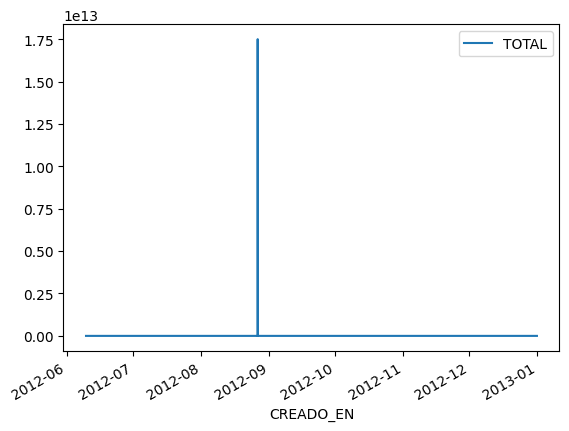

In [ ]:
ventas_2012.plot(x='CREADO_EN', y='TOTAL')

In [ ]:
ventas_2012_06 = ventas_2012[ventas_2012['Month'] == 6]

<AxesSubplot: xlabel='CREADO_EN'>

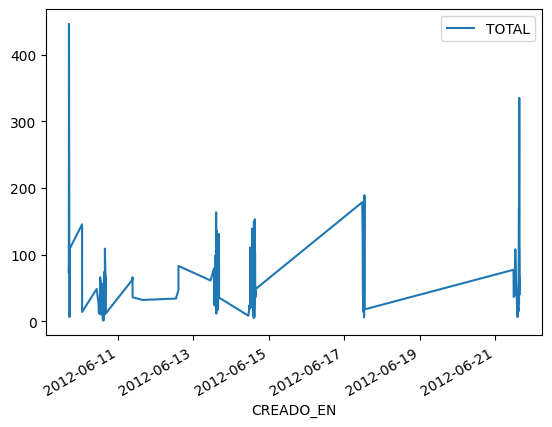

In [ ]:
ventas_2012_06.plot(x='CREADO_EN', y='TOTAL')

In [ ]:
ventas_2012_06.max()

CREADO_EN    2012-06-21 15:35:10.831000
TOTAL                        445.950012
Year                               2012
Month                                 6
dtype: object

In [ ]:
ventas_2012_06['TOTAL'].sum()

10100.233013153076

In [ ]:
ventas_2023 = ventas[ventas['Year'] == 2023]

In [ ]:
ventas_2023

,CREADO_EN,TOTAL,Year,Month
823730,2023-01-01 09:18:23.489,32.0,2023,1
823839,2023-01-01 11:00:00.639,64.0,2023,1
823840,2023-01-01 11:03:17.233,190.0,2023,1
823841,2023-01-01 11:48:56.322,85.0,2023,1
823842,2023-01-01 11:49:33.684,36.0,2023,1
...,...,...,...,...
825252,2023-01-08 14:03:11.464,30.0,2023,1
825253,2023-01-08 14:03:52.825,30.0,2023,1
825254,2023-01-08 14:04:20.315,46.0,2023,1
825255,2023-01-08 14:10:24.998,41.0,2023,1


<AxesSubplot: xlabel='CREADO_EN'>

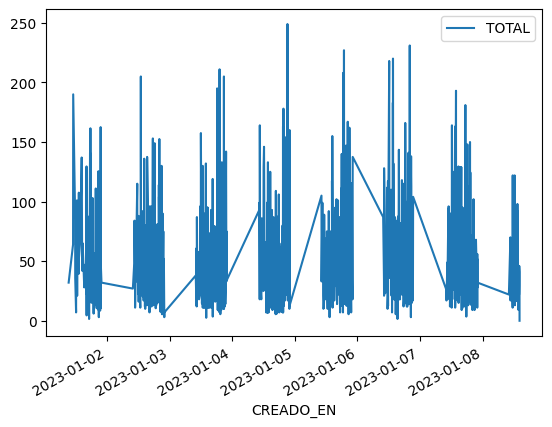

In [ ]:
ventas_2023.plot(x='CREADO_EN', y='TOTAL')

In [ ]:
ventas_2023['TOTAL'].groupby(ventas_2023['CREADO_EN'].dt.day).sum()

CREADO_EN
1     5820.5
2     9131.0
3    10582.0
4     9553.5
5     9492.5
6    10409.0
7     9948.5
8     2216.0
Name: TOTAL, dtype: float64

<AxesSubplot: xlabel='CREADO_EN'>

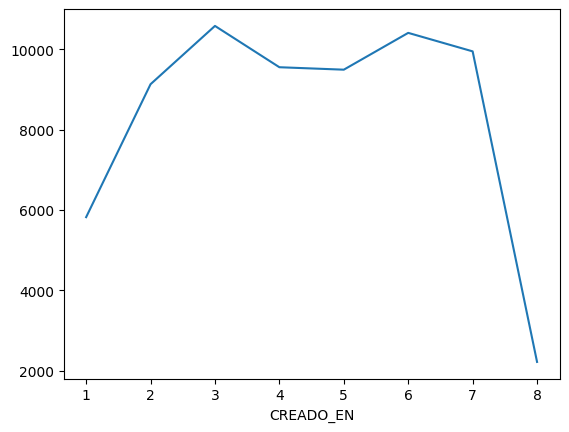

In [ ]:
ventas_2023['TOTAL'].groupby(ventas_2023['CREADO_EN'].dt.day).sum().plot()

In [ ]:
ventas_2022 = ventas[ventas['Year'] == 2022]

<AxesSubplot: xlabel='CREADO_EN'>

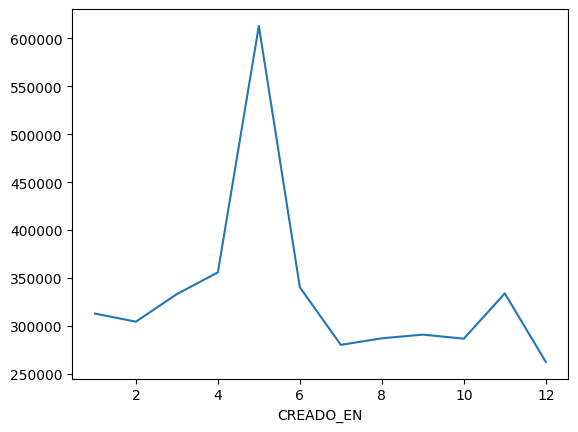

In [ ]:
ventas_2022['TOTAL'].groupby(ventas_2022['CREADO_EN'].dt.month).sum().plot()

In [ ]:
ventas_2022_05 = ventas_2022[ventas_2022['Month']==5]

In [ ]:
ventas_2022_05['TOTAL'].groupby(ventas_2022_05['CREADO_EN'].dt.day).sum()

CREADO_EN
1       9499.000000
2      10225.500000
3      11102.999901
4     318558.000000
5      12483.000000
6       9478.000107
7       9571.000000
8       8954.499901
9      11630.000092
10      8889.000000
11     10381.000000
12     10908.000000
13      8589.000000
14      9302.000000
15      9239.000000
16      9457.000000
17     10664.500000
18     10394.000000
19     10340.500000
20      8730.500000
21     10223.000000
22      8222.000000
23      9806.500000
24      9355.500000
25     10028.000000
26     10084.500000
27      9757.500000
28     10145.500000
29      8893.500099
30      8746.999893
31      9429.500000
Name: TOTAL, dtype: float64

In [ ]:
ventas_2022_05[ventas_2022_05['CREADO_EN'].dt.day == 4]['TOTAL'].idxmax()

775790

In [ ]:
ventas_2022_05[ventas_2022_05['CREADO_EN'].dt.day == 4]['TOTAL']

775562     37.5
775563     22.5
775564    158.0
775565    131.0
775566     30.0
          ...  
775797      8.5
775798     38.0
775799      9.5
775800     86.5
775801     40.0
Name: TOTAL, Length: 240, dtype: float64

In [ ]:
ventas.iloc[775790]

CREADO_EN    2022-05-04 22:05:14.172000
TOTAL                          305000.0
Year                               2022
Month                                 5
Name: 775790, dtype: object

In [ ]:
ventas.iloc[775785:775795]

,CREADO_EN,TOTAL,Year,Month
775785,2022-05-04 21:54:39.419,51.0,2022,5
775786,2022-05-04 21:55:22.178,20.0,2022,5
775787,2022-05-04 21:56:06.588,28.0,2022,5
775788,2022-05-04 22:02:50.179,185.5,2022,5
775789,2022-05-04 22:04:39.047,51.0,2022,5
775790,2022-05-04 22:05:14.172,305000.0,2022,5
775791,2022-05-04 22:06:50.978,15.0,2022,5
775792,2022-05-04 22:08:22.901,2090.5,2022,5
775793,2022-05-04 22:10:46.107,250.0,2022,5
775794,2022-05-04 22:12:10.202,265.0,2022,5


In [ ]:
ventas_2021 = ventas[ventas['Year'] == 2021]

In [ ]:
ventas_2020 = ventas[ventas['Year'] == 2020]

<AxesSubplot: xlabel='CREADO_EN'>

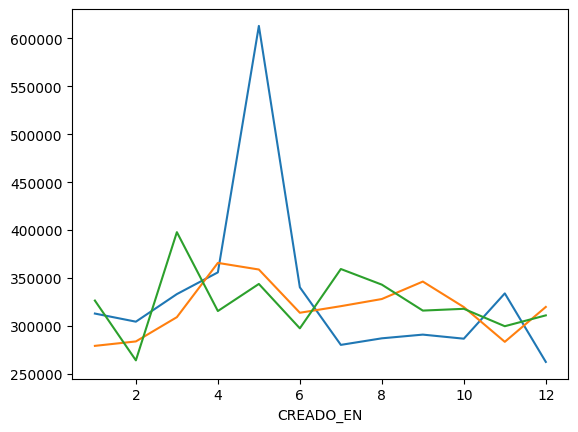

In [ ]:
ventas_2022['TOTAL'].groupby(ventas_2022['CREADO_EN'].dt.month).sum().plot() #blue
ventas_2021['TOTAL'].groupby(ventas_2021['CREADO_EN'].dt.month).sum().plot() #orange
ventas_2020['TOTAL'].groupby(ventas_2020['CREADO_EN'].dt.month).sum().plot() #green

In [ ]:
con.close()
cur.close()